In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./Oil_and_Gas_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date Symbol Series  Prev Close    Open    High     Low    Last  \
0     2015-01-01   ONGC     EQ      341.35  340.25  344.75  340.10  343.70   
1     2015-01-02   ONGC     EQ      344.05  344.10  352.50  344.10  350.00   
2     2015-01-05   ONGC     EQ      349.20  347.00  358.00  346.00  353.50   
3     2015-01-06   ONGC     EQ      353.15  348.55  348.95  330.60  331.75   
4     2015-01-07   ONGC     EQ      333.15  333.00  341.55  328.10  338.60   
...          ...    ...    ...         ...     ...     ...     ...     ...   
9391  2021-04-26   BPCL     EQ      423.05  426.00  428.35  417.55  417.60   
9392  2021-04-27   BPCL     EQ      418.90  417.50  423.10  416.55  420.00   
9393  2021-04-28   BPCL     EQ      420.35  422.00  424.35  414.90  417.15   
9394  2021-04-29   BPCL     EQ      417.50  422.00  423.00  417.00  419.00   
9395  2021-04-30   BPCL     EQ      419.55  417.50  437.50  414.65  422.10   

       Close    VWAP    Volume      Turnover  Trades  Deliverab

In [3]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [4]:
def train_model_for_stock(stock_df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1,1))

    sequence_length = 60
    X, y = create_sequences(pd.DataFrame(scaled_data), sequence_length)

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20)

    # Calculate RMSE and MSE for training
    trainPredict = model.predict(X_train)
    trainScore_RMSE = sqrt(mean_squared_error(y_train, trainPredict))
    trainScore_MSE = mean_squared_error(y_train, trainPredict)

    # Calculate RMSE and MSE for testing
    testPredict = model.predict(X_test)
    testScore_RMSE = sqrt(mean_squared_error(y_test, testPredict))
    testScore_MSE = mean_squared_error(y_test, testPredict)

    return trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, scaler.inverse_transform(testPredict), y_test, scaler.inverse_transform(y_test)

In [5]:
def plot_predictions(stock_name, true_values, predictions):
    plt.figure(figsize=(14,7))
    plt.plot(true_values, label='Actual Close Price')
    plt.plot(predictions, label='Predicted Close Price', alpha=0.7)
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [6]:
# Create a DataFrame to store the RMSE and MSE values
# Columns: 'Stock', 'Train_RMSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'
performance_df = pd.DataFrame(columns=['Stock', 'Train_RMaSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'])

Processing ONGC...
Epoch 1/20
38/38 [==============================] - 4s 30ms/step - loss: 0.0176
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 3/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0011
Epoch 4/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 5/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0010
Epoch 6/20
38/38 [==============================] - 1s 35ms/step - loss: 9.9180e-04
Epoch 7/20
38/38 [==============================] - 1s 32ms/step - loss: 9.6962e-04
Epoch 8/20
38/38 [==============================] - 1s 31ms/step - loss: 9.9139e-04
Epoch 9/20
38/38 [==============================] - 2s 40ms/step - loss: 9.1510e-04
Epoch 10/20
38/38 [==============================] - 2s 43ms/step - loss: 9.7224e-04
Epoch 11/20
38/38 [==============================] - 2s 43ms/step - loss: 9.2311e-04
Epoch 12/20
38/38 [==============================] - 1s 35ms/step - loss: 8

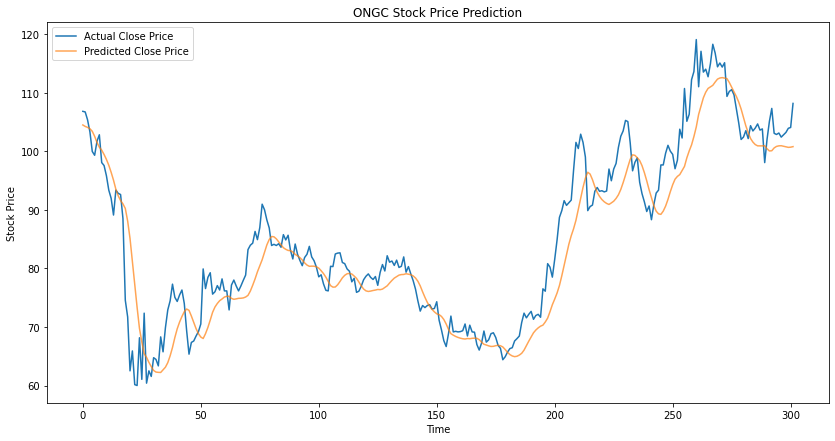

Processing RELIANCE...
Epoch 1/20
38/38 [==============================] - 5s 32ms/step - loss: 0.0083
Epoch 2/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0016
Epoch 4/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 5/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0013
Epoch 6/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 7/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0011
Epoch 8/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0011
Epoch 9/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0011
Epoch 10/20
38/38 [==============================] - 1s 35ms/step - loss: 9.8036e-04
Epoch 11/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0010
Epoch 12/20
38/38 [==============================] - 1s 34ms/step - loss: 9.1421e-04
Epoch 

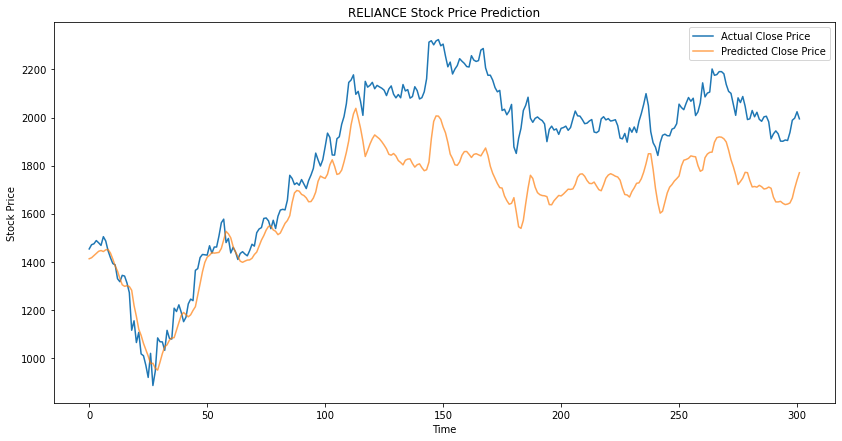

Processing COALINDIA...
Epoch 1/20
38/38 [==============================] - 4s 32ms/step - loss: 0.0286
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0026
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0013
Epoch 4/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0012
Epoch 5/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0011
Epoch 6/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0011
Epoch 7/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 8/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 9/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0010
Epoch 10/20
38/38 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 11/20
38/38 [==============================] - 1s 35ms/step - loss: 9.8718e-04
Epoch 12/20
38/38 [==============================] - 1s 34ms/step - loss: 9.1468e-04
Epoch

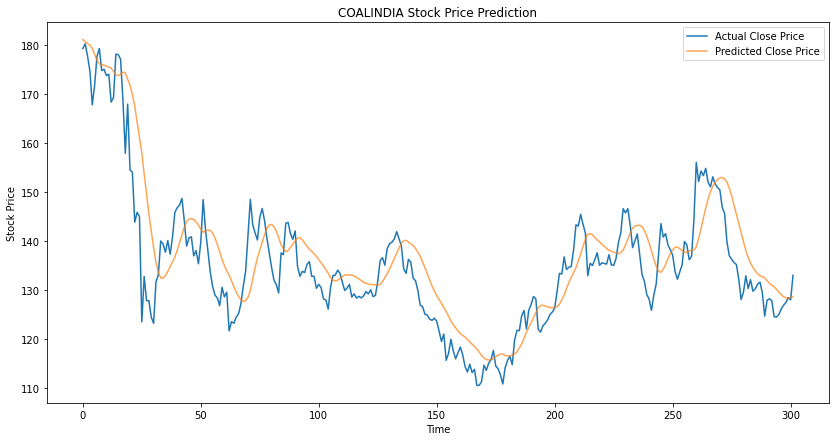

Processing GAIL...
Epoch 1/20
38/38 [==============================] - 4s 34ms/step - loss: 0.0258
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0031
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0021
Epoch 4/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0020
Epoch 5/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0019
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0019
Epoch 7/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0020
Epoch 8/20
38/38 [==============================] - 2s 47ms/step - loss: 0.0017
Epoch 9/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0016
Epoch 10/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0019
Epoch 11/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0015
Epoch 12/20
38/38 [==============================] - 1s 39ms/step - loss: 0.0015
Epoch 13/20
38/38 

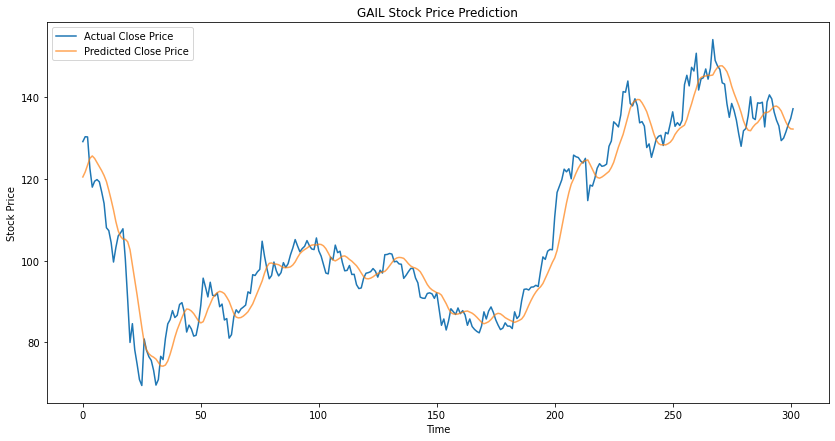

Processing IOC...
Epoch 1/20
38/38 [==============================] - 5s 38ms/step - loss: 0.0211
Epoch 2/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0025
Epoch 3/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0023
Epoch 4/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0022
Epoch 5/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0020
Epoch 6/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0019
Epoch 7/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0019
Epoch 8/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0017
Epoch 9/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0019
Epoch 10/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0015
Epoch 11/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0016
Epoch 12/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0014
Epoch 13/20
38/38 [

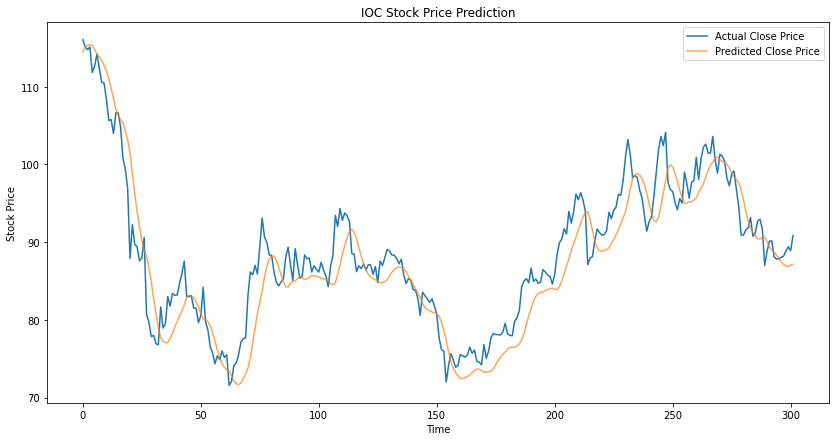

Processing BPCL...
Epoch 1/20
38/38 [==============================] - 6s 44ms/step - loss: 0.0175
Epoch 2/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0029
Epoch 3/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0026
Epoch 4/20
38/38 [==============================] - 2s 51ms/step - loss: 0.0025
Epoch 5/20
38/38 [==============================] - 2s 45ms/step - loss: 0.0023
Epoch 6/20
38/38 [==============================] - 2s 45ms/step - loss: 0.0023
Epoch 7/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0021
Epoch 8/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0022
Epoch 9/20
38/38 [==============================] - 2s 46ms/step - loss: 0.0020
Epoch 10/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0019
Epoch 11/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0017
Epoch 12/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0019
Epoch 13/20
38/38 

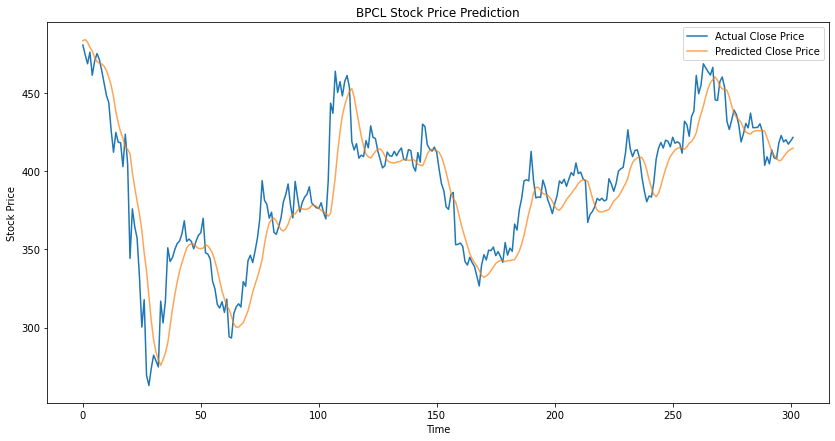

In [7]:
unique_stocks = df['Symbol'].unique()

# Initialize an empty list to store performance metrics for each stock
performance_list = []

for stock in unique_stocks:
    stock_df = df[df['Symbol'] == stock]
    if len(stock_df) > 2 * 60:  # Ensure there's enough data
        print(f"Processing {stock}...")
        trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, predictions, y_test, true_values = train_model_for_stock(stock_df)
        plot_predictions(stock, true_values, predictions)
        
        # Create a dictionary with the performance metrics
        current_stock_performance = {
            'Stock': stock,  # Replace with the actual stock name
            'Train_RMSE': trainScore_RMSE,
            'Train_MSE': trainScore_MSE,
            'Test_RMSE': testScore_RMSE,
            'Test_MSE': testScore_MSE
        }
        
        # Append the dictionary to the list
        performance_list.append(current_stock_performance)

# Create a DataFrame from the list of dictionaries
performance_df = pd.DataFrame(performance_list)

# Now 'performance_df' contains the RMSE and MSE values for all stocks

In [8]:
performance_df

,Stock,Train_RMSE,Train_MSE,Test_RMSE,Test_MSE
0,ONGC,0.030486,0.000929,0.016825,0.000283
1,RELIANCE,0.025650,0.000658,0.153151,0.023455
2,COALINDIA,0.025122,0.000631,0.021418,0.000459
3,GAIL,0.033536,0.001125,0.011690,0.000137
4,IOC,0.030429,0.000926,0.006224,0.000039
5,BPCL,0.033972,0.001154,0.021241,0.000451
